# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

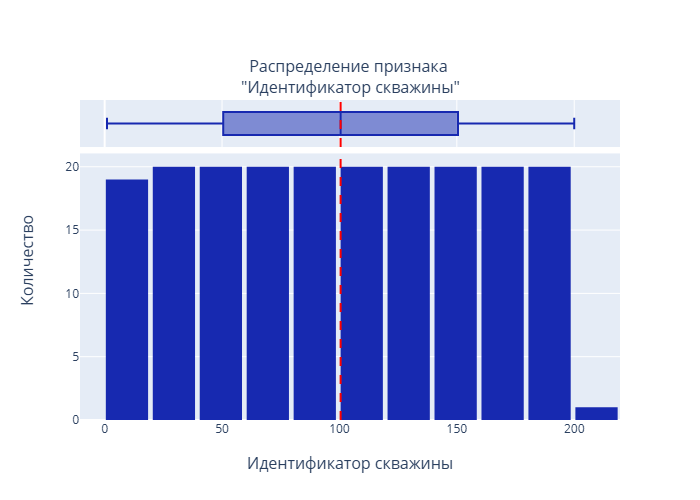

Статистические данные признака:


count    200.00
mean     100.50
std       57.88
min        1.00
25%       50.75
50%      100.50
75%      150.25
max      200.00
Name: Well, dtype: float64

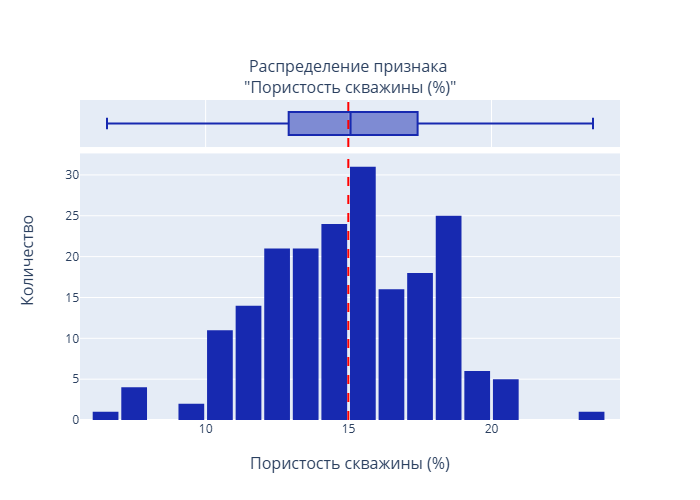

Статистические данные признака:


count    200.00
mean      14.99
std        2.97
min        6.55
25%       12.91
50%       15.07
75%       17.40
max       23.55
Name: Por, dtype: float64

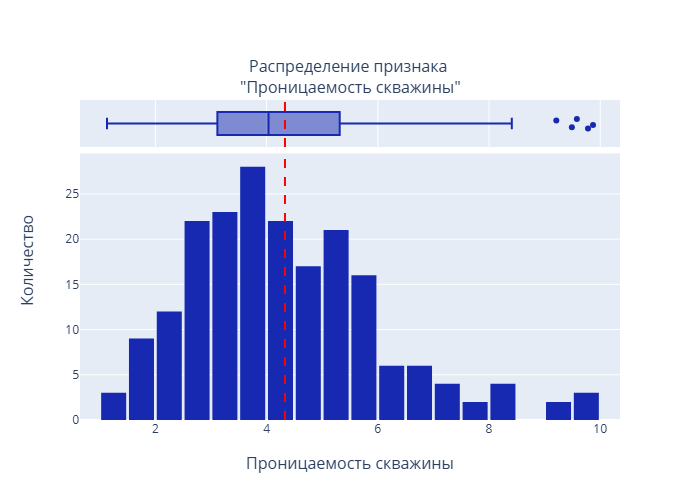

Статистические данные признака:


count    200.00
mean       4.33
std        1.73
min        1.13
25%        3.12
50%        4.04
75%        5.29
max        9.87
Name: Perm, dtype: float64

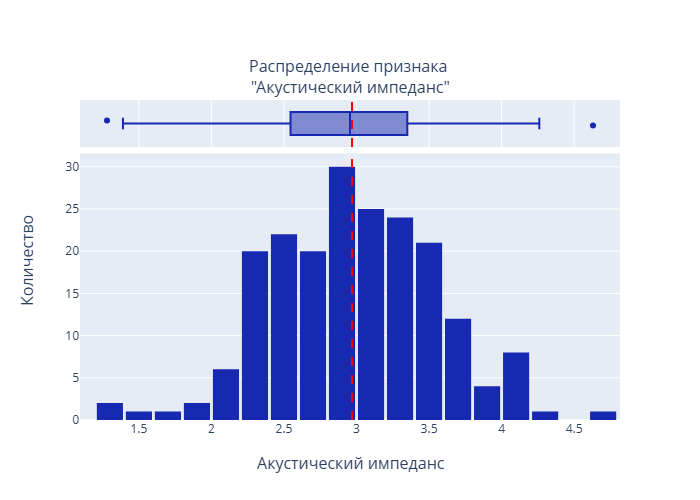

Статистические данные признака:


count    200.00
mean       2.97
std        0.57
min        1.28
25%        2.55
50%        2.96
75%        3.34
max        4.63
Name: AI, dtype: float64

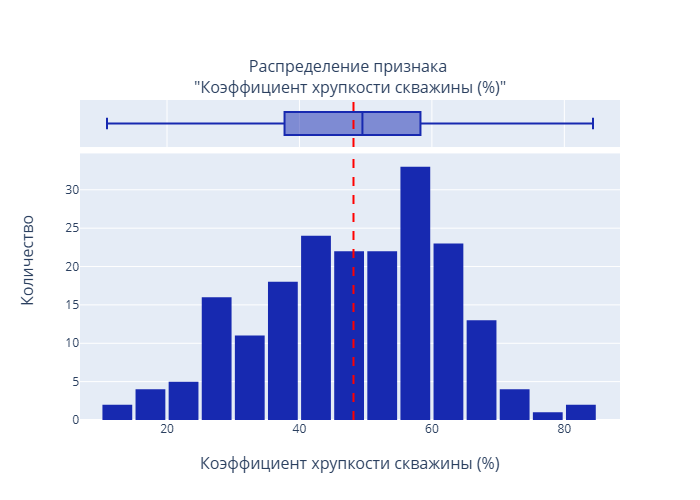

Статистические данные признака:


count    200.00
mean      48.16
std       14.13
min       10.94
25%       37.75
50%       49.51
75%       58.26
max       84.33
Name: Brittle, dtype: float64

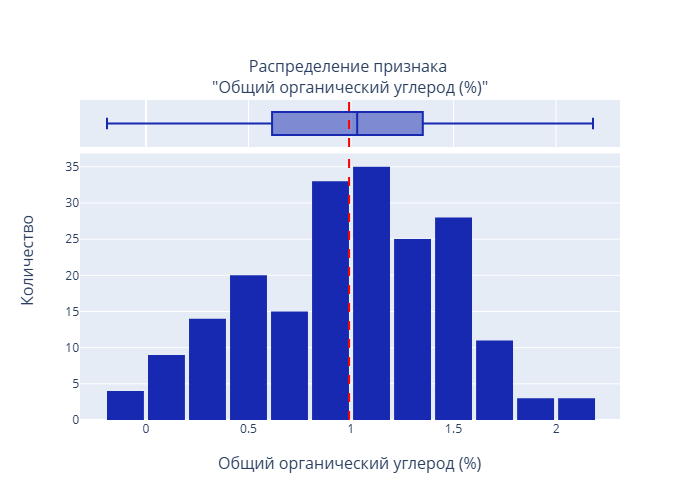

Статистические данные признака:


count    200.00
mean       0.99
std        0.48
min       -0.19
25%        0.62
50%        1.03
75%        1.35
max        2.18
Name: TOC, dtype: float64

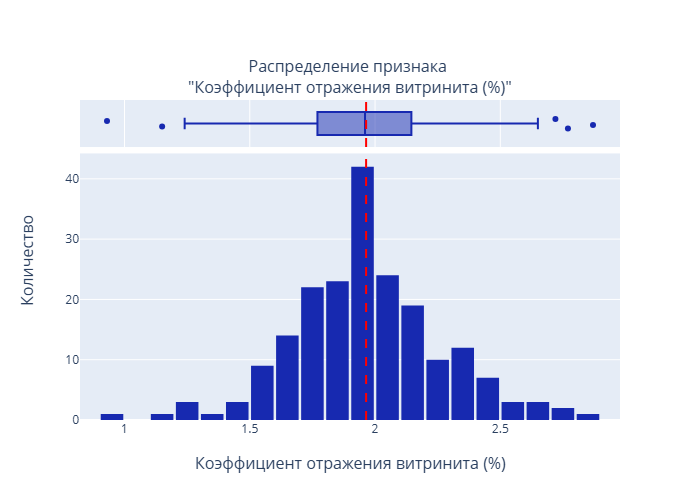

Статистические данные признака:


count    200.00
mean       1.96
std        0.30
min        0.93
25%        1.77
50%        1.96
75%        2.14
max        2.87
Name: VR, dtype: float64

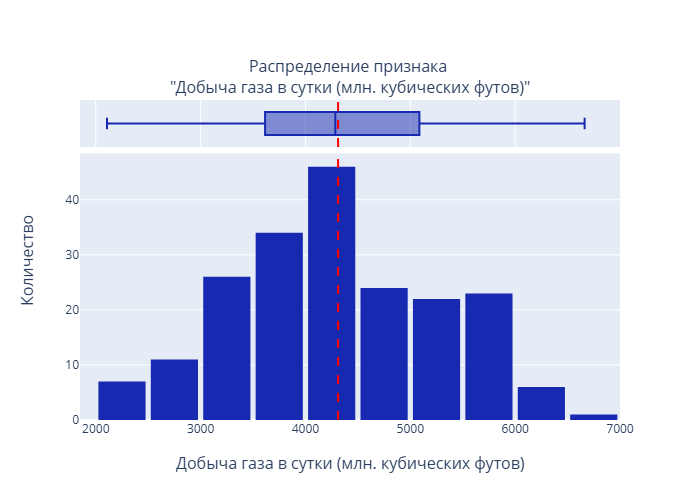

Статистические данные признака:


count     200.00
mean     4311.22
std       992.04
min      2107.14
25%      3618.06
50%      4284.69
75%      5086.09
max      6662.62
Name: Prod, dtype: float64

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Расшифровка признаков
dict_col_name_rus = {'Well': 'Идентификатор скважины',
                     'Por': 'Пористость скважины (%)',
                     'Perm': 'Проницаемость скважины',
                     'AI': 'Акустический импеданс',
                     'Brittle': 'Коэффициент хрупкости скважины (%)',
                     'TOC': 'Общий органический углерод (%)',
                     'VR': 'Коэффициент отражения витринита (%)',
                     'Prod': 'Добыча газа в сутки (млн. кубических футов)'}


def plot_numerical_feature(data: pd.DataFrame, col: str, main_title: str):
    ''' Функция отрисовывает коробчатую диаграмму и гистограмму распределения
    и выводит статистические данные числового признака.
    Args:
        data (pd.DataFrame): датасет
        col (str): наименование признака
        main_title (str): расшифровка наименования признака для вывода
            в титуле графика
    Returns:
        None
    '''
    # Инициализация полотна на два графика с общей осью X
    fig_col = make_subplots(rows=2, cols=1,
                            shared_xaxes=True, # Общая ось Х
                            x_title=main_title,
                            y_title='Количество',
                            row_heights=[0.15, 0.85], # Относительная высота полотен
                            subplot_titles=(f"Распределение признака <br>\"{main_title}\"", ""),
                            vertical_spacing=0.02) # Высота разделителя
    # Построение коробчатой диаграммы
    fig_col.add_trace(go.Box(x=data[col],
                             marker_color = '#1729B0', # Цвет маркера
                             jitter=0.5, # Разнос точек выбросов по вертикали
                             name='',
                             showlegend=False),
                      row=1, col=1)
    # Построение гистограммы
    fig_col.add_trace(go.Histogram(x=data[col],
                                   marker_color = '#1729B0', # Цвет маркера
                                   name=main_title, # Название набора данных
                                   showlegend=False),
                      row=2, col=1)
    # Построение линии среднего значения
    fig_col.add_vline(x=data[col].mean(),
                      line=dict(color="Red", dash='dash')) # Стиль линии
    # Размер полотна
    fig_col.update_layout(autosize = False, width = 1000, height = 550,
                          bargap=0.1) # Расстояние между столбцами гистограммы
    fig_col.show('png')

    print('Статистические данные признака:')
    display(data[col].describe().round(2))
# Построение гистограммы распределения каждого числового признака
for col in data.columns:
        plot_numerical_feature(data, col, dict_col_name_rus[col])

**Идентификатор скважины**:

- распределение близко к равномерному;
- среднее значение 100.50;
- медиана 100.50;
- признак распределен в пределах от 1.00 до 200.00;
- выбросы отсутствуют.

**Пористость скважины**:

- распределение ненормальное с множественными пиками;
- среднее значение 14.99;
- медиана 15.07;
- признак распределен в пределах от 6.55 до 23.55;
- выбросы отсутствуют.

**Проницаемость скважины**:

- распределение ненормальное с множественными пиками;
- среднее значение 4.33;
- медиана 4.04;
- признак распределен в пределах от 1.13 до 9.87;
- выбросы присутствуют в области максимальных значений.

**Акустический импеданс**:

- распределение ненормальное с множественными пиками;
- среднее значение 2.97;
- медиана 2.96;
- признак распределен в пределах от 1.28 до 4.63;
- выбросы присутствуют в области максимальных и минимальных значений.

**Коэффициент хрупкости скважины (%)**:

- распределение ненормальное с множественными пиками;
- среднее значение 48.16;
- медиана 49.51;
- признак распределен в пределах от 10.94 до 84.33;
- выбросы отсутствуют.

**Общий органический углерод (%)**:

- распределение ненормальное с множественными пиками;
- среднее значение 0.99;
- медиана 1.03;
- признак распределен в пределах от -0.19 до 2.18;
- выбросы отсутствуют.

**Коэффициент отражения витринита (%)**:

- распределение близко к нормальному;
- среднее значение 1.96;
- медиана 1.96;
- признак распределен в пределах от 0.93 до 2.87;
- выбросы присутствуют в области максимальных и минимальных значений.

Целевой признак - **Добыча газа в сутки**:

- распределение близко к нормальному;
- среднее значение 4311.22;
- медиана 4284.69;
- признак распределен в пределах от 2107.14 до 6662.62;
- выбросы отсутствуют.  



> Таким образом, датасет содержит 200 наблюдений по 8 признакам (7 факторов, 1 - целевой). Все признаки числовые, большая часть имеет ненормальное распределение с множественными пиками, оценочно присутствует небольшое количество выбросов в трех признаках.

***Примечание:*** *наличие выбросов приведено согласно коробчатой диаграммы.*

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Пары сильно коррелирующих признаков:
Perm - Por: 0.761
TOC - Por: 0.712
Prod - Por: 0.862
Prod - Perm: 0.727


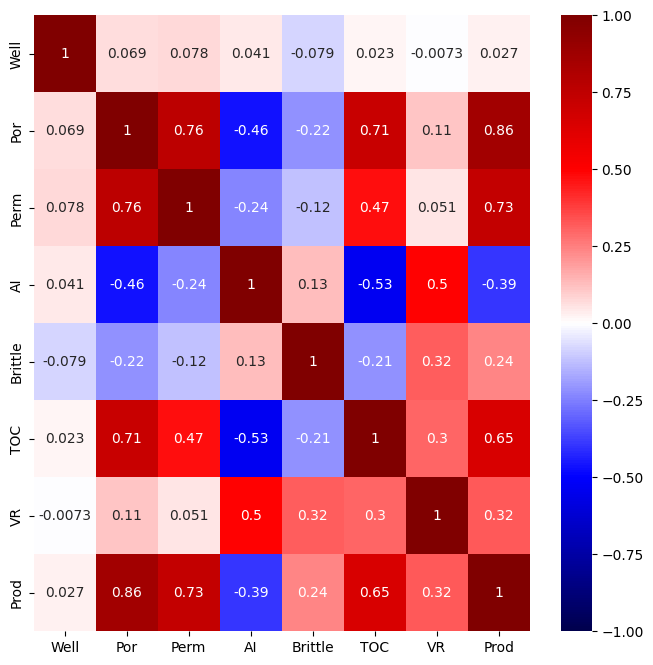

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.00073


In [4]:
# Получение матрицы корреляций
data_corr = data.corr(numeric_only=True)
# Вычисление списка пар сильно коррелирующих признаков
print('Пары сильно коррелирующих признаков:')
strong_corr_features = []
for i in range(1, data_corr.shape[0]):
    for j in range(0, i):
        if abs(data_corr.iloc[i, j]) >= 0.7:
            strong_corr_features.append(f'{data_corr.index[i]} - {data_corr.columns[j]}: {data_corr.iloc[i, j]:.3f}')
print(*strong_corr_features, sep='\n') if len(strong_corr_features) > 0 else print('отсутствуют')
# Визуализация матрицы корреляций
plt.figure(figsize=(8, 8))
sns.heatmap(data_corr,
            annot=True,
            vmin=-1, vmax=1,
            center=0,
            cmap='seismic')
plt.show()
print(f'Ранг корреляционной матрицы: {np.linalg.matrix_rank(data_corr)}')
print(f'Определитель корреляционной матрицы: {np.linalg.det(data_corr):.5f}')

> Cильнее всего с целевой переменной коррелируют:
> - **'Пористость скважины (%)'** (Por);
> - **'Проницаемость скважины'** (Perm);
> - **'Общий органический углерод (%)'** (TOC).
>
> Корреляционная матрица является плохо обусловенной, так как её опредитель близок к нулю.  
> Признаки наличия чистой коллинераности отсутствуют, при этом есть пары сильно коррелирующих признаков, что свидетельствует о мультиколлинеарности в данных.  
> В данном случае модель классической линейной регрессии по методу наименьших квадратов формально применима, но наиболее вероятно, что она даст нестабильные, ненадёжные оценки, не позволит корректно интерпретировать модель, а также может вызвать численные ошибки при вычислении обратной матрицы.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Получение матрицы наблюдений и вектора правильных ответов
A = data.values
y = A[:, -1]
X = A[:, 0:7]
# Добавление столбца 1 для расчета интерсепта
X = np.column_stack([np.ones(200), X])
# Вычисление OLS-оценки
ols_w=np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты:')
for i, col in enumerate(['Интерсепт', *data.columns[0:7]]):
    print(f'{col}: {ols_w[i]:.0f}')

Коэффициенты:
Интерсепт: -1232
Well: 0
Por: 230
Perm: 116
AI: -365
Brittle: 25
TOC: -78
VR: 785


> В соответствии с полученными коэффициентами признак Well ('Идентификатор скважины') не оказывают влияния на целевую переменную.  
> Интерпретация коэффициентов полученной модели линейной регрессии:
> - увеличение пористости скважины на 1% ведет к увеличению добычи газа в сутки на 230 млн. кубических футов;
> - увеличение акустического импеданс на условную единицу ведет к снижению добычи газа в сутки на 365 млн. кубических футов;
> - увеличение коэффициента отражения витринита на 1% ведет к увеличению добычи газа в сутки на 785 млн. кубических футов.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Данные скважины
gas_well = {'Well': 106.0,
            'Por': 15.32,
            'Perm': 3.71,
            'AI': 3.29,
            'Brittle': 55.99,
            'TOC': 1.35,
            'VR': 2.42}
# Прогнозирование добычи
gas_well_X = np.array([[1, *gas_well.values()]])
print(f'Прогноз добычи в сутки: {gas_well_X@ols_w}')
print(f'Абсолютная ошибка полученного прогноза: {abs(4748.315024 - gas_well_X@ols_w)} млн. кубических футов')

# Оценка модели
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
y_pred = X@ols_w
print(f'MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.2f}%')

Прогноз добычи в сутки: [4723.06405371]
Абсолютная ошибка полученного прогноза: [25.25097029] млн. кубических футов
MAE: 153.62
MAPE: 3.63%


> а) Прогноз добычи в сутки скважины с указанными значениями составил 4723.06 млн. куб. футов, что отличается от действительного значения на 25.25 млн. куб. футов.  
> б) Полученная модель на тренировочных данных в абсолютном значении ошибается в среднем на 153.62 млн. куб. футов, или на 3.63%

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [7]:
# Вывод признаков с противоречащими коэффициентами
for i, col in enumerate(['Интерсепт', *data.columns[0:7]]):
    if i == 0:
        continue
    if ols_w[i]*data_corr['Prod'].iloc[i-1] < 0:
        print(f'Для признака {col} коэффициент модели: {ols_w[i]:.0f}')
        print(f'    коэффициент корреляции: {data_corr["Prod"].iloc[i-1]:.3f}')

Для признака TOC коэффициент модели: -78
    коэффициент корреляции: 0.654


> В полученной модели присутствует фактор **TOC** (Общий органический углерод (%)), при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции: корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Предположительно это связано с наличием высокой степени корреляции данного фактора с признаком **Por** (Пористость скважины (%)), также в контексте остальных признаков он может ухудшать предсказательную точность модели в целом.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Получение списка исключаемых признаков
excluded_features = []
# Слабо коррелирующие с целевым признаком
for sign in data_corr['Prod'].index:
    if abs(data_corr['Prod'].loc[sign]) < 0.05:
        excluded_features.append(sign)
# Сильно коррелирующие факторы
for i in range(1, data_corr.shape[0]):
    for j in range(0, i):
        if abs(data_corr.iloc[i, j]) >= 0.7:
            if data_corr.index[i] == 'Prod' \
               or  data_corr.columns[j] == 'Prod':
                continue
            else:
                if data_corr["Prod"][data_corr.index[i]] > data_corr["Prod"][data_corr.columns[j]]:
                    excluded_features.append(data_corr.columns[j])
                else:
                    excluded_features.append(data_corr.index[i])
print('Список исключаемых признаков: ', *excluded_features)
clear_data = data.drop(excluded_features, axis=1)
# Получение матрицы наблюдений и вектора правильных ответов
A = clear_data.values
y = A[:, -1]
X = A[:, 0:clear_data.shape[1]-1]
# Добавление столбца 1 для расчета интерсепта
X = np.column_stack([np.ones(200), X])
# Вычисление OLS-оценки
ols_w=np.linalg.inv(X.T@X)@X.T@y
print('Коэффициенты модели:')
for i, col in enumerate(['Интерсепт', *clear_data.columns[0:clear_data.shape[1]-1]]):
    print(f'{col}: {ols_w[i]:.0f}')

# Оценка модели
print('Оценка модели:')
y_pred = X@ols_w
print(f'MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.2f}%')

# Получение матрицы корреляций
data_corr_new = clear_data.corr(numeric_only=True)
# Вывод признаков с противоречащими коэффициентами
print('Признаки с противоречащими коэффициентами:')
for i, col in enumerate(['Интерсепт', *clear_data.columns[0:clear_data.shape[1]-1]]):
    if i == 0:
        continue
    if ols_w[i]*data_corr_new['Prod'].iloc[i-1] < 0:
        print(f'Для признака {col} коэффициент модели: {ols_w[i]:.0f}')
        print(f'    коэффициент корреляции: {clear_data["Prod"].iloc[i-1]:.3f}')

Список исключаемых признаков:  Well Perm TOC
Коэффициенты модели:
Интерсепт: -1835
Por: 293
AI: -200
Brittle: 28
VR: 517
Оценка модели:
MAE: 171.43
MAPE: 4.04%
Признаки с противоречащими коэффициентами:


>  Интерпретация коэффициентов полученной модели линейной регрессии:
> - увеличение пористости скважины на 1% ведет к увеличению добычи газа в сутки на 293 млн. кубических футов (ранее на 230);  
> - увеличение акустического импеданс на условную единицу ведет к снижению добычи газа в сутки на 200 млн. кубических футов (ранее на 365);  
> - увеличение коэффициента отражения витринита на 1% ведет к увеличению добычи газа в сутки на 517 млн. кубических футов (ранее на 785).  
>
> Полученная модель на тренировочных данных в абсолютном значении ошибается в среднем на 171.43 млн. куб. футов, или на 4.04% (ранее на 153.62 и 3.63% cсоответственно)
> 
> Таким образом, точность данной модели незначительно упала, но, учитывая отсутствие противоречивых коэффициентов линейной регрессии и коэффициентов корреляции, а также сильно скоррелированных признаков, можно утверждать, что интерпретация полученных коэффициентов качественно лучше отражает выявленные закономерности, чем в предыдущей модели.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
from sklearn.linear_model import LinearRegression

# Разделение выборки
X = clear_data.drop('Prod', axis=1, inplace = False)
y = clear_data['Prod']
# Формирование модели линейной регрессии
model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(X, y)

print('Коэффициенты модели:')
print(f'Интерсепт: {model_LR.intercept_:.0f}')
for i, col in enumerate(clear_data.columns[0:clear_data.shape[1]-1]):
    print(f'{col}: {model_LR.coef_[i]:.0f}')

# Оценка модели
print('Оценка модели:')
y_pred = model_LR.predict(X)
print(f'MAE: {mean_absolute_error(y, y_pred):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.2f}%')

Коэффициенты модели:
Интерсепт: -1835
Por: 293
AI: -200
Brittle: 28
VR: 517
Оценка модели:
MAE: 171.43
MAPE: 4.04%


> Модель, полученная при использовании библиотеки `scikit-learn (sklearn)`, имеет такие же коэффициенты и оценки, что и модель, полученная вручную, что свидетельствует об идентичности данных методов.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [11]:
# Инициализация стандартизатора
scaler = StandardScaler()
X_scl = scaler.fit_transform(X)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3, include_bias=False)
X_scl_pl = poly.fit_transform(X_scl)
print(f'Количество сгенерированных полиномиальных признаков: {X_scl_pl.shape[1] - X.shape[1]}')

# Формирование модели линейной регрессии
model_LR_scl_pl = LinearRegression(n_jobs=-1)
model_LR_scl_pl.fit(X_scl_pl, y)

# Оценка качества модели на кросс-валидации
cv_results = cross_validate(model_LR_scl_pl, X_scl_pl, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))

cv_results = cross_validate(model_LR_scl_pl, X_scl_pl, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

Количество сгенерированных полиномиальных признаков: 30
MAE на тренировочных фолдах: 75.35
MAE на валидационных фолдах: 110.47
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


> Благодаря проведению стандартизации отобранных признаков, а также генерации дополнительных 30 полиномиальных признаков (итого 34 признака в датасете), качество модели в сравнении с оценками, полученными ранее, существенно повысилось.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [12]:
# Создание модели линейной регрессии c L1-регуляризацией
param_grid = {'alpha': np.arange(0.1, 5, 0.1)}
grid_search_L1 = GridSearchCV(estimator=Lasso(max_iter=10000), 
                              param_grid=param_grid, 
                              scoring='neg_mean_absolute_percentage_error',
                              cv=5, 
                              n_jobs = -1)  
grid_search_L1.fit(X_scl_pl, y) 

# Оценка качества модели на кросс-валидации
cv_results = cross_validate(grid_search_L1, X_scl_pl, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
cv_results = cross_validate(grid_search_L1, X_scl_pl, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

print("Наилучшие значения гиперпараметров: {}".format(grid_search_L1.best_params_))

# Подсчет количества нулевых значений
count_zeros = np.sum(grid_search_L1.best_estimator_.coef_ == 0)
print(f'Количество нулевых коэффициентов: {count_zeros}')

MAE на тренировочных фолдах: 77.85
MAE на валидационных фолдах: 96.64
MAPE на тренировочных фолдах: 1.82 %
MAPE на валидационных фолдах: 2.30 %
Наилучшие значения гиперпараметров: {'alpha': np.float64(4.6)}
Количество нулевых коэффициентов: 15


> При использовании регуляризации Lasso оптимальным значением параметра *alpha* является **4.6**. При данном значении сокращена разница между оценками на тренировочных и валидных фолдах, что свидетельствует о снижении степени переобучения модели. Из 34 признаков коэффициенты 15 были снижены до 0, что показывает наличие высокоскоррелированных и/или малозначащих признаков, исключенных из модели.

> Здесь и далее в качестве оптимизатора гиперпараметров выбран GridSearchCV (полный перебор возможных значений/сочетаний значений), так как набор данных небольшой и обучение каждой отдельной модели занимает приемлемое количество времени.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [13]:
# Создание модели линейной регрессии c L2-регуляризацией
param_grid = {'alpha': np.arange(0.1, 5, 0.1)}
grid_search_L2 = GridSearchCV(estimator=Ridge(), 
                              param_grid=param_grid, 
                              scoring='neg_mean_absolute_percentage_error',
                              cv=5, 
                              n_jobs = -1)  
grid_search_L2.fit(X_scl_pl, y) 

# Оценка качества модели на кросс-валидации
cv_results = cross_validate(grid_search_L2, X_scl_pl, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
cv_results = cross_validate(grid_search_L2, X_scl_pl, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

print("Наилучшие значения гиперпараметров: {}".format(grid_search_L2.best_params_))

MAE на тренировочных фолдах: 75.44
MAE на валидационных фолдах: 110.25
MAPE на тренировочных фолдах: 1.78 %
MAPE на валидационных фолдах: 2.68 %
Наилучшие значения гиперпараметров: {'alpha': np.float64(0.2)}


> При использовании регуляризации Ridge оптимальным значением параметра *alpha* является **0.2**. Оценки полученной модели несколько ниже по сравнению с применением регуляризации Lasso, но лучше, чем модели LinearRegression, построенной на тех же данных (стандартизованных с генерацией полиномиальных признаков).

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Создание модели линейной регрессии ElasticNet
param_grid = {'alpha': np.arange(0.01, 3, 0.05),
              'l1_ratio': np.arange(0.1, 1, 0.05)}
grid_search_ENet = GridSearchCV(estimator=ElasticNet(max_iter=10000), 
                                param_grid=param_grid, 
                                scoring='neg_mean_absolute_percentage_error',
                                cv=5, 
                                n_jobs = -1)  
grid_search_ENet.fit(X_scl_pl, y) 

# Оценка качества модели на кросс-валидации
cv_results = cross_validate(grid_search_ENet, X_scl_pl, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-cv_results['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-cv_results['test_score'].mean()))
cv_results = cross_validate(grid_search_ENet, X_scl_pl, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

print("Наилучшие значения гиперпараметров: {}".format(grid_search_ENet.best_params_))

MAE на тренировочных фолдах: 75.54
MAE на валидационных фолдах: 110.04
MAPE на тренировочных фолдах: 1.78 %
MAPE на валидационных фолдах: 2.68 %
Наилучшие значения гиперпараметров: {'alpha': np.float64(0.060000000000000005), 'l1_ratio': np.float64(0.9500000000000003)}


> При использовании регуляризации ElasticNet оптимальными значениями гиперпараметров являются: *alpha* - **0.06**, *l1_ratio* - **0.95**. Оценки полученной модели равны оценкам модели с регулризацией Ridge и несколько ниже по сравнению с применением регуляризации Lasso, но лучше, чем модели LinearRegression, построенной на тех же данных (стандартизованных с генерацией полиномиальных признаков).

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [15]:
# Словарь итоговых моделей (модель, обучение на полином.признаках?, наличие гиперпараметров?)
result = {'LR': (model_LR, False, False),
          'LR на Std&Poly': (model_LR_scl_pl, True, False),
          'LR Lasso': (grid_search_L1, True, True),
          'LR Ridge': (grid_search_L2, True, True),
          'LR ElasticNet': (grid_search_ENet, True, True)}
df_statistic = pd.DataFrame(columns=['Модель', 
                                     'Гиперпараметры', 
                                     'Исп. полиномиальных признаков',
                                     'MAE train',
                                     'MAE test',
                                     'MAPE train, %',
                                     'MAPE test, %',
                                     'Разница MAPE train & test'])
# Получение данных по моделям
for model in result:
    name = model
    if result[model][2]:
        hyperparameters = ''
        for hp in result[model][0].best_params_:
                    hyperparameters += hp + str(f': {result[model][0].best_params_[hp]:.2f}   ')
    else:
        hyperparameters = '-'
    poly = result[model][1]
    if poly:
        cv_results = cross_validate(result[model][0], X_scl_pl, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
        MAE_train = -cv_results['train_score'].mean()
        MAE_test = -cv_results['test_score'].mean()
        cv_results = cross_validate(result[model][0], X_scl_pl, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
        MAPE_train = -cv_results['train_score'].mean()* 100
        MAPE_test = -cv_results['test_score'].mean() * 100
    else:
        cv_results = cross_validate(result[model][0], X, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
        MAE_train = -cv_results['train_score'].mean()
        MAE_test = -cv_results['test_score'].mean()
        cv_results = cross_validate(result[model][0], X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
        MAPE_train = -cv_results['train_score'].mean()* 100
        MAPE_test = -cv_results['test_score'].mean() * 100
    div_MAPE = abs(MAPE_train - MAPE_test)
    
    df_statistic.loc[len(df_statistic)] = {'Модель': name, 
                                           'Гиперпараметры': hyperparameters, 
                                           'Исп. полиномиальных признаков': poly,
                                           'MAE train': MAE_train,
                                           'MAE test': MAE_test,
                                           'MAPE train, %': MAPE_train,
                                           'MAPE test, %': MAPE_test,
                                           'Разница MAPE train & test': div_MAPE}

# Отображение результатов
display(df_statistic)

,Модель,Гиперпараметры,Исп. полиномиальных признаков,MAE train,MAE test,"MAPE train, %","MAPE test, %",Разница MAPE train & test
0,LR,-,False,170.497027,179.019453,4.021160,4.231003,0.209842
1,LR на Std&Poly,-,True,75.345310,110.473609,1.773240,2.680875,0.907635
2,LR Lasso,alpha: 4.60,True,77.851888,96.637385,1.817224,2.301082,0.483858
3,LR Ridge,alpha: 0.20,True,75.440449,110.249524,1.775467,2.679915,0.904447
4,LR ElasticNet,alpha: 0.06 l1_ratio: 0.95,True,75.542168,110.037402,1.778018,2.676242,0.898224


> В соответствии с результатами, представленными в сводной таблице, наилучшими оценочными показателями на тренировочных данных обладает модель линейной регрессии, построенная без использования регуляризации на стандартизованных данных с полиномиальными признаками (**LR на Std&Poly**). Однако, данная модель показала максимальную из приведенных разницу с оценкой на валидационных фолдах, что свидетельствует о самой высокой степени переобучения модели.  
> Наиболее оптимальные результаты показала модель линейной регрессии, построенная с использованием L1-регуляризации на стандартизованных данных с полиномиальными признаками (**LR Lasso**). Степень переобучения данной модели несколько выше, чем модели **LR**, но ее абсолютные значения оценок существенно лучше.